In [1]:
#Import the libraries
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#In any machine learning project you should alwayse know the shape of the data 
print (mnist.data.shape)
print (mnist.target.shape)

(70000, 784)
(70000,)


In [11]:
sample = np.random.randint(70000, size=35000) #choose the number of samples you want to use in the learning phase, it's more efficient if you use the whole dataset
data = mnist.data[sample] #specifie the features
target = mnist.target[sample] #specifie the labels 

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8) #split the features and labels into training and testing data 

In [18]:
# Create the KNN model and initialize the n_neighbors value "K" at 3
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)


KNeighborsClassifier()

In [19]:
#get the score of the model 
knn.score(xtest, ytest)


0.966

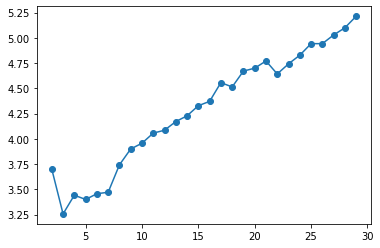

Le paramètre K minimisant le plus l'erreur est : 3-NN


In [17]:
#create a loop to decide what is the perfect K value to minimize the loss 
errors = []
for k in range(2,30):
    knn = neighbors.KNeighborsClassifier(k) #each time you create a knn model and calculate it's loss 
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,30), errors, 'o-') #visualise each K value and its loss
plt.show()
best_k = errors.index(min(errors)) + 2 #Car on test à partir de 2-NN
print("Le paramètre K minimisant le plus l'erreur est : ",best_k,"-NN",sep="")

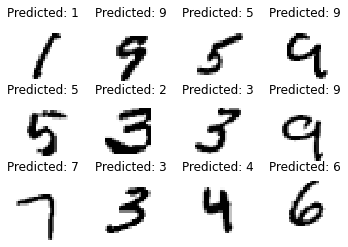

In [20]:
# We create a new KNN model using the perfect K value 
knn = neighbors.KNeighborsClassifier(3)
knn.fit(xtrain, ytrain)
# get the predictions on the test data 
predicted = knn.predict(xtest)
# We resize the data in the form of images
images = xtest.reshape((-1, 28, 28))
# We select randomly a sample of 12 images 
select = np.random.randint(images.shape[0], size=12)
# We display the images with their associated prediction
for index, value in enumerate(select):
 plt.subplot(3,4,index+1)
 plt.axis('off')
 plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
 plt.title('Predicted: {}'.format( predicted[value]) )
plt.show()